<a href="https://colab.research.google.com/github/hsiuliwang/new/blob/main/dfs_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

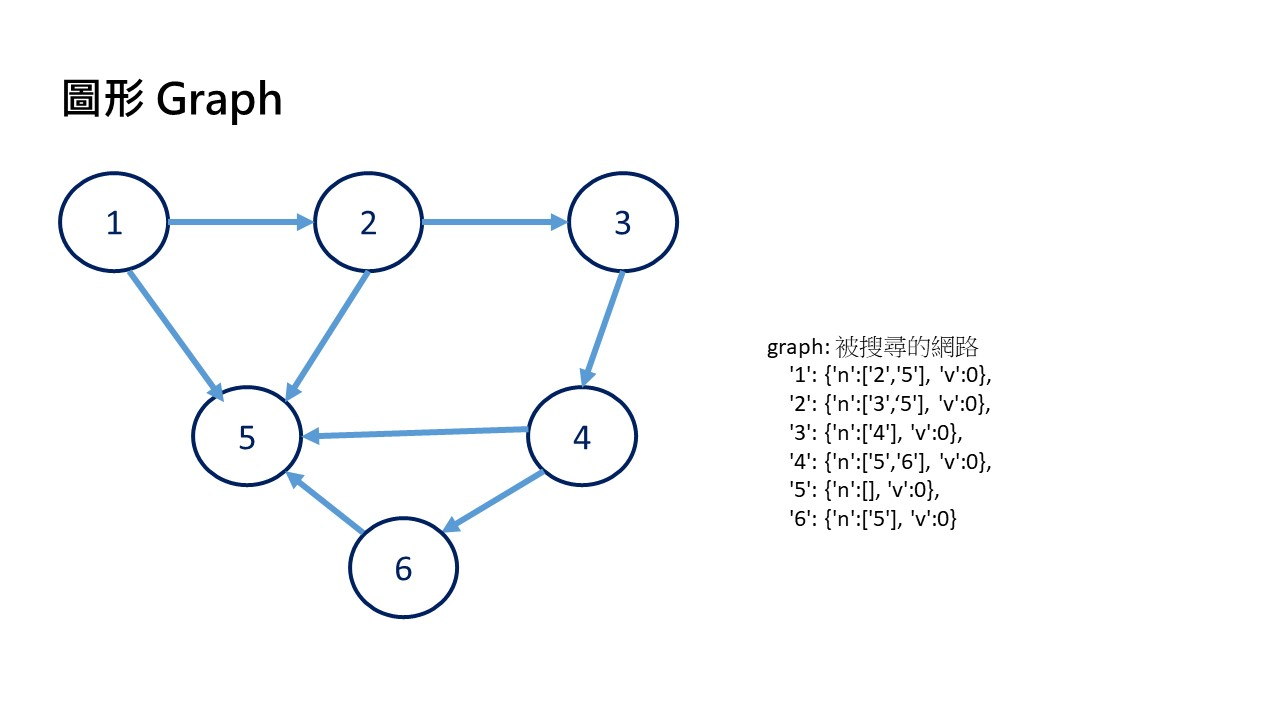

In [ ]:
def enqueue(a, o):
    a.insert(0, o)

def dequeue(a):
    return a.pop()

g = { #  graph: 被搜尋的網路
    '1': {'n':['2','5'], 'v':0}, #  n: neighbor (鄰居), v: visited (是否被訪問過)
    '2': {'n':['3','5'], 'v':0},
    '3': {'n':['4'], 'v':0},
    '4': {'n':['5','6'], 'v':0},
    '5': {'n':[], 'v':0},
    '6': {'n':['5'], 'v':0}
}

def init(g): #  初始化、設定 visited 為 0
    for i in g:
        g[i]['v'] = 0

def dfs(g, node): #  深度優先搜尋
    if g[node]['v']!=0:           #  如果已訪問過，就不再訪問
        return
    print(node, '=> ', end = '')  #  否則、印出節點
    g[node]['v'] = 1              #    並設定為已訪問
    neighbors = g[node]['n']      # 取出鄰居節點
    for n in neighbors:           #  對於每個鄰居
        dfs(g, n)                 #    逐一進行訪問

queue=['1'] #  BFS 用的 queue, 起始點為 1。

def bfs(g, q): #  廣度優先搜尋
    if len(q)==0:                 #  如果 queue 已空，則返回。
        return
    node = dequeue(q)             #  否則、取出 queue 的第一個節點。
    if g[node]['v'] == 0:         #  如果該節點尚未拜訪過。
        g[node]['v'] = 1          #    標示為已拜訪
    else:                         #  否則 (已訪問過)
        return                    #    不繼續搜尋，直接返回。
    print(node, '=> ', end = '')  #  印出節點
    neighbors = g[node]['n']      #  取出鄰居。
    for n in neighbors: #  對於每個鄰居
        if not g[n]['v']:         #  假如該鄰居還沒被拜訪過
            enqueue(q, n)         #    就放入 queue 中
    bfs(g, q)
    bfs(g, q)
    bfs(g, q)

print('dfs:', end = '')
init(g)
dfs(g, '1') # 呼叫深度優先搜尋。
print('')

print('bfs:', end = '')
init(g)
bfs(g, queue) # 呼叫廣度優先搜尋。
print('')

dfs:1 => 2 => 3 => 4 => 5 => 6 => 
bfs:1 => 2 => 5 => 3 => 4 => 6 => 


In [ ]:
##其他程式補充 (廣度有問題)


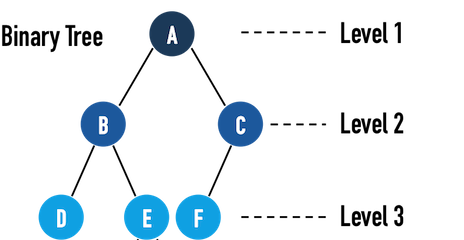

In [ ]:
class Node:
    
    def __init__(self, name):
        self.name = name
        self.visited = False
        self.neighbors = []
        
    def __repr__(self):
        return 'Node(name={})'.format(self.name)

class BFS:
    """
    For BFS, use queue; For DFS, use stack or recursion
    """
    def __init__(self, start):
        self.queue = []
        self.start = start
        
    def traversal(self):
        self.start.visited = True
        self.queue.append(self.start)
        
        while self.queue:
            
            node = self.queue.pop(0)
            yield node
            
            for n in node.neighbors:
                if not n.visited:
                    n.visited = True
                    self.queue.append(n)

na = Node('A')
nb = Node('B')
nc = Node('C')
nd = Node('D')
ne = Node('E')
nf = Node('F')

na.neighbors = [nb, nc]
nb.neighbors = [nd, ne]
nc.neighbors = [nf]

bfs = BFS(na)

for node in bfs.traversal():
    print(node)

Node(name=A)
Node(name=B)
Node(name=C)
Node(name=D)
Node(name=E)
Node(name=F)


In [ ]:
class Node:
    
    def __init__(self, name):
        self.name = name
        self.visited = False
        self.neighbors = []
        self.predecessor = None  # use in shortest path
        
    def __repr__(self):
        return 'Node(name={})'.format(self.name)

class DFS:
    """
    For BFS, use queue; For DFS, use stack / recursion(os stack)
    """
    def __init__(self, start):
        self.start = start
        
    def traversal(self):
        interface = self.stack()
        interface(self.start)
        return self.result
        
    def stack(self):
        self.result = []
        def interface(node):
            self.result.append(node)            
            node.visited = True
            for n in node.neighbors:
                if not n.visited:
                    interface(n) 
        return interface

na = Node('A')
nb = Node('B')
nc = Node('C')
nd = Node('D')
ne = Node('E')
nf = Node('F')

na.neighbors = [nb, nc]
nb.neighbors = [nd, ne]
nc.neighbors = [nf]

dfs = DFS(na)

for node in dfs.traversal():
    print(node)


Node(name=A)
Node(name=B)
Node(name=D)
Node(name=E)
Node(name=C)
Node(name=F)


In [ ]:
參考來源:
https://super9.space/archives/1562
https://gist.github.com/travishen/761e8028fda4b257e7fe6f24d77e980a
https://gist.github.com/travishen/a24313e320c250bfbc9255bc728fa30d